In [16]:
import requests
import json
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
BALSHT = requests.get('https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=AAPL&apikey=BNM3OK9KHBBVD3YZ') #api request for balance sheet for AAPL
INCSTAT = requests.get('https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=AAPL&apikey=BNM3OK9KHBBVD3YZ') #api request for income statement for AAPL


In [3]:
bsdata = BALSHT.text
bsparsed = json.loads(bsdata)
bsquartdata = bsparsed['quarterlyReports']
bsquartdf = pd.DataFrame.from_dict(bsquartdata)

isdata = INCSTAT.text
isparsed = json.loads(isdata)
isquartdata = isparsed['quarterlyReports']
isquartdf = pd.DataFrame.from_dict(isquartdata)

In [4]:
bsolddf = pd.read_excel("AAPL BAL SHEET.xls")

isolddf = pd.read_excel("AAPL INCOME SHEET.xls")

In [29]:
assets_liab_new = bsquartdf[['fiscalDateEnding', 'totalAssets', 'totalLiabilities']]
assets_liab_new['fiscalDateEnding'] = pd.to_datetime(assets_liab_new['fiscalDateEnding'])
assets_liab_new[['totalAssets', 'totalLiabilities']] = assets_liab_new[['totalAssets', 'totalLiabilities']].apply(pd.to_numeric)
assets_liab_old = bsolddf[['Period End Date', 'TOTAL ASSETS', 'TOTAL LIABILITIES']]
new_cols = {x: y for x, y in zip(assets_liab_old.columns, assets_liab_new.columns)}
assets_liab1 = assets_liab_new.append(assets_liab_old.rename(columns=new_cols))
assets_liab = assets_liab1.set_index('fiscalDateEnding')
assets_liab

<ipython-input-29-6ed98fd9699b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets_liab_new['fiscalDateEnding'] = pd.to_datetime(assets_liab_new['fiscalDateEnding'])
C:\Users\jovin\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,totalAssets,totalLiabilities
fiscalDateEnding,,
2020-12-31,354054000000,287830000000
2020-09-30,323888000000,258549000000
2020-06-30,317344000000,245062000000
2020-03-31,320400000000,241975000000
2019-12-31,340618000000,251087000000
2019-09-30,338516000000,248028000000
2019-06-30,322239000000,225783000000
2019-03-31,341998000000,236138000000
2018-12-31,373719000000,255827000000


<AxesSubplot:xlabel='fiscalDateEnding', ylabel='totalAssets'>

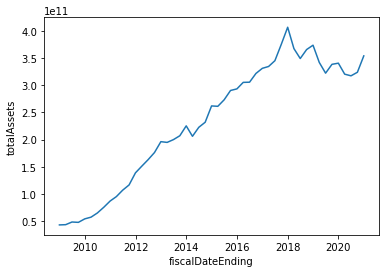

In [6]:
sb.lineplot(data=assets_liab, x="fiscalDateEnding", y="totalAssets")

<AxesSubplot:xlabel='fiscalDateEnding', ylabel='totalLiabilities'>

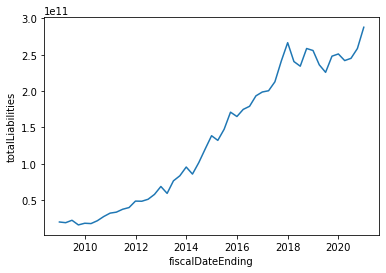

In [7]:
sb.lineplot(data=assets_liab, x="fiscalDateEnding", y="totalLiabilities")

In [8]:
profits_new = isquartdf[['fiscalDateEnding', 'grossProfit']]
profits_new['fiscalDateEnding'] = pd.to_datetime(profits_new['fiscalDateEnding'])
profits_new['grossProfit'] = pd.to_numeric(profits_new['grossProfit'])
profits_old = isolddf[['Period End Date', 'Gross Profit']]
new_cols = {x: y for x, y in zip(profits_old.columns, profits_new.columns)}
profits1 = profits_new.append(profits_old.rename(columns=new_cols))
profits = profits1.set_index('fiscalDateEnding')
profits



<ipython-input-8-fefe651fbfa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_new['fiscalDateEnding'] = pd.to_datetime(profits_new['fiscalDateEnding'])
<ipython-input-8-fefe651fbfa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_new['grossProfit'] = pd.to_numeric(profits_new['grossProfit'])


,grossProfit
fiscalDateEnding,
2020-12-31,44328000000
2020-09-30,24689000000
2020-06-30,22680000000
2020-03-31,22370000000
2019-12-31,35217000000
2019-09-30,24313000000
2019-06-30,20227000000
2019-03-31,21821000000
2018-12-31,32031000000


<AxesSubplot:xlabel='fiscalDateEnding', ylabel='grossProfit'>

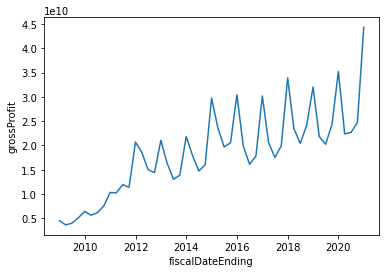

In [9]:
sb.lineplot(data=profits, x="fiscalDateEnding", y="grossProfit")

In [44]:
assets_liab_ordinal = assets_liab.copy(deep=True)
assets_liab_ordinal.index = assets_liab_ordinal.index.map(dt.datetime.toordinal)
profits_ordinal = profits.copy(deep=True)
profits_ordinal.index = profits_ordinal.index.map(dt.datetime.toordinal)

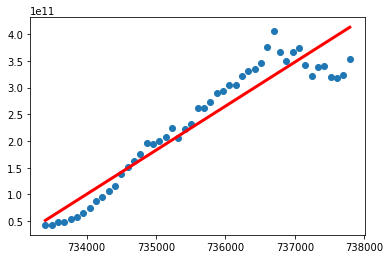

In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

ordinalno = pd.DataFrame(assets_liab_ordinal.index)
totalassets = pd.DataFrame(assets_liab_ordinal['totalAssets'])
totalliabs = pd.DataFrame(assets_liab_ordinal['totalLiabilities'])

linreg.fit(ordinalno, totalassets)
regline_x = ordinalno
regline_y = linreg.intercept_ + linreg.coef_ * ordinalno

plt.scatter(ordinalno, totalassets)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

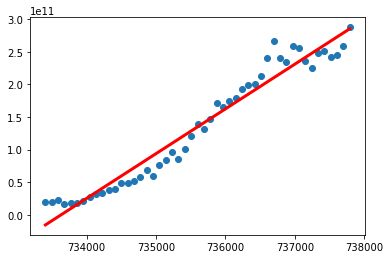

In [42]:
linreg1 = LinearRegression()
linreg1.fit(ordinalno, totalliabs)
regline_x = ordinalno
regline_y = linreg1.intercept_ + linreg1.coef_ * ordinalno

plt.scatter(ordinalno, totalliabs)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

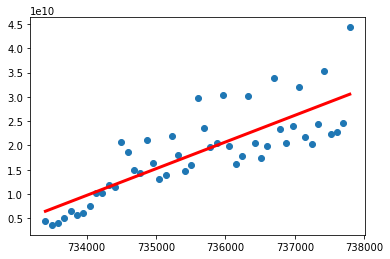

In [46]:
ordinalno = pd.DataFrame(profits_ordinal.index)
profits = pd.DataFrame(profits_ordinal['grossProfit'])

linreg2 = LinearRegression()
linreg2.fit(ordinalno, profits)
regline_x = ordinalno
regline_y = linreg2.intercept_ + linreg2.coef_ * ordinalno

plt.scatter(ordinalno, profits)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

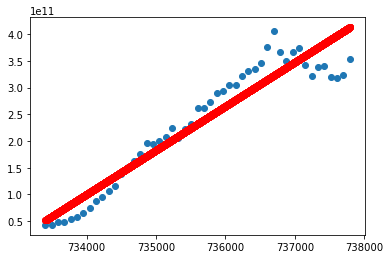

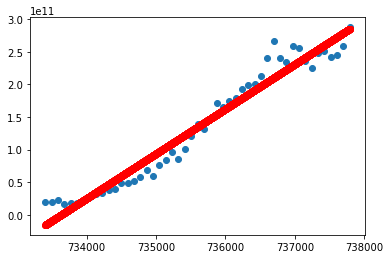

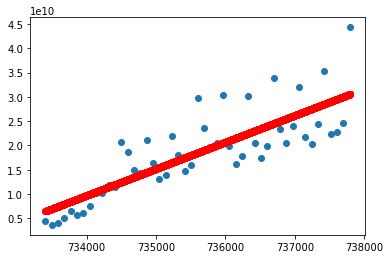

In [102]:
ordinalno_linreg = pd.DataFrame(range(dt.date(year=2020, month=12, day=31).toordinal(), dt.date(year=2008, month=12, day=31).toordinal() - 1, -1))
totalassets_pred = linreg.predict(ordinalno_linreg)
totalliabs_pred = linreg1.predict(ordinalno_linreg)
profits_pred = linreg2.predict(ordinalno_linreg)

plt.scatter(ordinalno, totalassets)
plt.scatter(ordinalno_linreg, totalassets_pred, color = "r")
plt.show()

plt.scatter(ordinalno, totalliabs)
plt.scatter(ordinalno_linreg, totalliabs_pred, color = "r")
plt.show()

plt.scatter(ordinalno, profits)
plt.scatter(ordinalno_linreg, profits_pred, color = "r")
plt.show()



In [113]:
linregdata = pd.DataFrame({'OrdinalNo': range(dt.date(year=2020, month=12, day=31).toordinal(), dt.date(year=2008, month=12, day=31).toordinal() - 1, -1), 'totalAssets': totalassets_pred.flatten(), 'totalLiabilities': totalliabs_pred.flatten(), 'grossProfits': profits_pred.flatten()}, columns=['OrdinalNo', 'totalAssets', 'totalLiabilities', 'grossProfits'])

linregdata['OrdinalNo'] = linregdata['OrdinalNo'].map(dt.datetime.fromordinal)
linregdata

,OrdinalNo,totalAssets,totalLiabilities,grossProfits
0,2020-12-31,4.129379e+11,2.855243e+11,3.054125e+10
1,2020-12-30,4.128554e+11,2.854556e+11,3.053575e+10
2,2020-12-29,4.127729e+11,2.853869e+11,3.053025e+10
3,2020-12-28,4.126904e+11,2.853181e+11,3.052476e+10
4,2020-12-27,4.126079e+11,2.852494e+11,3.051926e+10
...,...,...,...,...
4379,2009-01-04,5.164909e+10,-1.543009e+10,6.465320e+09
4380,2009-01-03,5.156659e+10,-1.549881e+10,6.459822e+09
4381,2009-01-02,5.148408e+10,-1.556754e+10,6.454324e+09
4382,2009-01-01,5.140158e+10,-1.563627e+10,6.448826e+09
